C:\Users\arthu\anaconda3\ZebraLib\zebralib\zebraperformance.py:1232: RuntimeWarning: invalid value encountered in sqrt
  N = (A * (B - C)) ** 0.5
C:\Users\arthu\anaconda3\ZebraLib\zebralib\zebraperformance.py:1232: RuntimeWarning: invalid value encountered in sqrt
  N = (A * (B - C)) ** 0.5


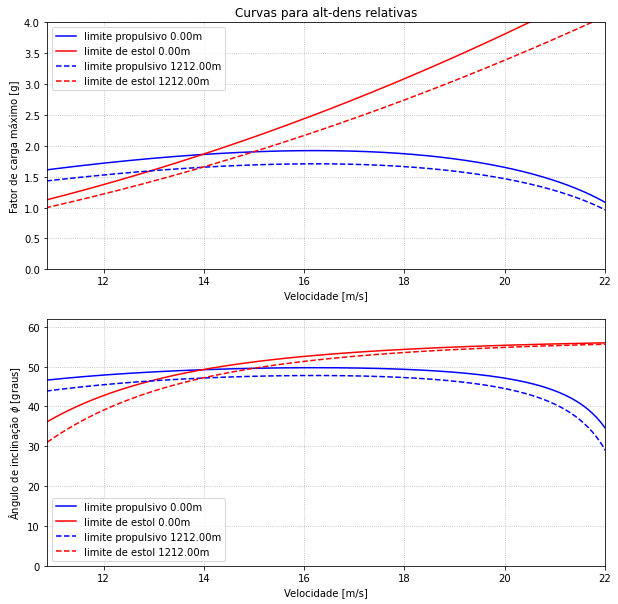

C:\Users\arthu\anaconda3\ZebraLib\zebralib\zebraperformance.py:1324: RuntimeWarning: invalid value encountered in sqrt
  R = V ** 2 / (g * (n ** 2 - 1) ** 0.5)
C:\Users\arthu\anaconda3\ZebraLib\zebralib\zebraperformance.py:1387: RuntimeWarning: invalid value encountered in sqrt
  w = (g * (((n ** 2) - 1) ** 0.5)) / V


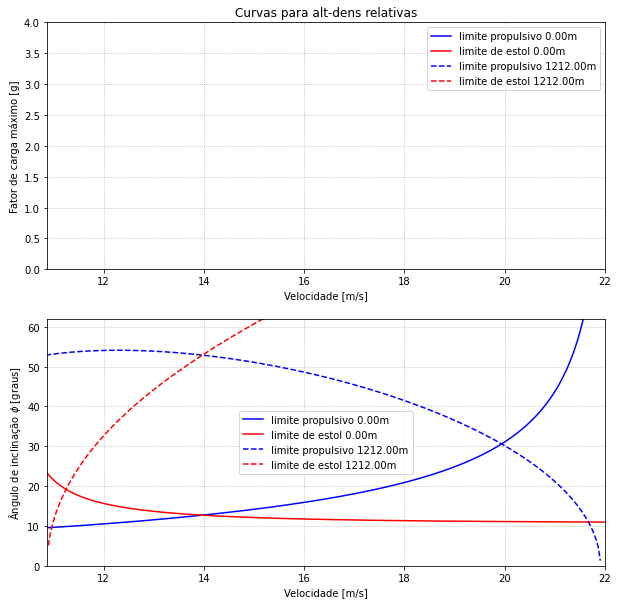

In [2]:
import ZebraLib as zb
import numpy as np
import matplotlib.pyplot as plt

#Avião para ser analisado
Zb = zb.Airplane(name='Versão 3.0', b=1.86, S=0.843, Af=0.601, c=0.463, CLmax= 1.5193, 
              Load=5.5, mv=2.8, CLn=1.080, Swet= 10, Nmax=2.1 , Tc=(-0.001, -0.225, 35.225))

# Gerando os dados 
V = np.linspace(0.01, 40, 1000)

# Altitude-densidade
alt = [0, 1212]
dens_0 = zb.alt2rho(alt[0])
dens_1 = zb.alt2rho(alt[1])

Np_0, phip_0 = Zb.turn_Nprop(V, dens_0)  # Cálculo dos fatores de carga
Ns_0, phis_0 = Zb.turn_Nsust(V, dens_0)

# Plotando os gráficos
fig, ax = plt.subplots(figsize=(10, 10),nrows=2, ncols=1)

#SUBPLOT 1
#Fator de carga durante as curvas
ax[0].set(title=f'Curvas para alt-dens relativas',
       xlabel='Velocidade [m/s]', ylabel='Fator de carga máximo [g]')

ax[1].set(ylabel=r'Ângulo de inclinação $\phi$ [graus]', xlabel='Velocidade [m/s]')

ax[0].plot(V, Np_0, color='b', label=f'limite propulsivo {alt[0]:.2f}m')
ax[0].plot(V, Ns_0, color='red', label=f'limite de estol {alt[0]:.2f}m')
ax[1].plot(V, phip_0, color='b', label=f'limite propulsivo {alt[0]:.2f}m')
ax[1].plot(V, phis_0, color='red', label=f'limite de estol {alt[0]:.2f}m')
#ax[0].axhline(y=Zb.Nmax, color='green', label=f'Limite estrutural de ${Zb.Nmax}g$')

Np_1, phip_1 = Zb.turn_Nprop(V, dens_1)  # Cálculo dos fatores de carga
Ns_1, phis_1 = Zb.turn_Nsust(V, dens_1)

ax[0].plot(V, Np_1,'--', color='b', label=f'limite propulsivo {alt[1]:.2f}m')
ax[0].plot(V, Ns_1,'--',  color='red', label=f'limite de estol {alt[1]:.2f}m')
ax[1].plot(V, phip_1,'--', color='b', label=f'limite propulsivo {alt[1]:.2f}m')
ax[1].plot(V, phis_1,'--', color='red', label=f'limite de estol {alt[1]:.2f}m')
#ax[0].axhline(y=Zb.Nmax, color='green', label=f'Limite estrutural de ${Zb.Nmax}g$')

ax[0].set_xlim(Zb.veloc_Req(Zb.CLmax, zb.alt2rho(1212)), 22)
ax[0].set_ylim(0, 4)
ax[0].grid(linestyle='dotted')
ax[0].legend()

ax[1].set_ylim(0, 62)
ax[1].set_xlim(Zb.veloc_Req(Zb.CLmax, zb.alt2rho(1212)), 22)
ax[1].grid(linestyle='dotted')
ax[1].legend()

plt.show()

fig, ax = plt.subplots(figsize=(10, 10),nrows=2, ncols=1)

#Raio de curva
Rp_0 = Zb.turn_Radius(V, Np_0)          #Limite propulsivo
Rs_0 = Zb.turn_Radius(V, Ns_0)          #Limite pelo estol da asa (CL)
Rp_1 = Zb.turn_Radius(V, Np_1)          #Limite propulsivo
Rs_1 = Zb.turn_Radius(V, Ns_1)          #Limite pelo estol da asa (CL)

Rstr = Zb.turn_Radius(V, Zb.Nmax)       #Limite estrutural de Nmáx 

#Razão de curva
Wp_0 = Zb.turn_Rate(V, Np_0)            #Limite propulsivo
Ws_0 = Zb.turn_Rate(V, Ns_0)            #Limite pelo estol da asa (CL)
Wp_1 = Zb.turn_Rate(V, Np_1)            #Limite propulsivo
Ws_1 = Zb.turn_Rate(V, Ns_1)            #Limite pelo estol da asa (CL)

Wstr = Zb.turn_Rate(V, Zb.Nmax)         #Limite estrutural de Nmáx 

#SUBPLOT 1
#Fator de carga durante as curvas
ax[0].set(title=f'Curvas para alt-dens relativas',
       xlabel='Velocidade [m/s]', ylabel='Fator de carga máximo [g]')

ax[1].set(ylabel=r'Ângulo de inclinação $\phi$ [graus]', xlabel='Velocidade [m/s]')

ax[0].plot(V, Rp_0, color='b', label=f'limite propulsivo {alt[0]:.2f}m')
ax[0].plot(V, Rs_0, color='red', label=f'limite de estol {alt[0]:.2f}m')
ax[1].plot(V, Rp_0, color='b', label=f'limite propulsivo {alt[0]:.2f}m')
ax[1].plot(V, Rs_0, color='red', label=f'limite de estol {alt[0]:.2f}m')
#ax[0].axhline(y=Zb.Nmax, color='green', label=f'Limite estrutural de ${Zb.Nmax}g$')

ax[0].plot(V, Wp_0,'--', color='b', label=f'limite propulsivo {alt[1]:.2f}m')
ax[0].plot(V, Ws_0,'--',  color='red', label=f'limite de estol {alt[1]:.2f}m')
ax[1].plot(V, Wp_1,'--', color='b', label=f'limite propulsivo {alt[1]:.2f}m')
ax[1].plot(V, Ws_1,'--', color='red', label=f'limite de estol {alt[1]:.2f}m')
#ax[0].axhline(y=Zb.Nmax, color='green', label=f'Limite estrutural de ${Zb.Nmax}g$')

ax[0].set_xlim(Zb.veloc_Req(Zb.CLmax, zb.alt2rho(1212)), 22)
ax[0].set_ylim(0, 4)
ax[0].grid(linestyle='dotted')
ax[0].legend()

ax[1].set_ylim(0, 62)
ax[1].set_xlim(Zb.veloc_Req(Zb.CLmax, zb.alt2rho(1212)), 22)
ax[1].grid(linestyle='dotted')
ax[1].legend()
plt.show()

C:\Users\arthu\anaconda3\ZebraLib\zebralib\zebraperformance.py:1232: RuntimeWarning: invalid value encountered in sqrt
  N = (A * (B - C)) ** 0.5
C:\Users\arthu\anaconda3\ZebraLib\zebralib\zebraperformance.py:1232: RuntimeWarning: invalid value encountered in sqrt
  N = (A * (B - C)) ** 0.5


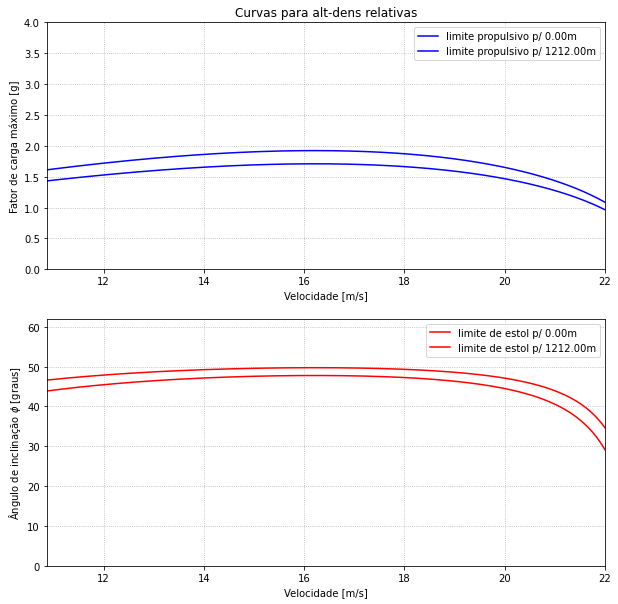

In [5]:
import ZebraLib as zb
import numpy as np
import matplotlib.pyplot as plt

#Avião para ser analisado
Zb = zb.Airplane(name='Versão 3.0', b=1.86, S=0.843, Af=0.601, c=0.463, CLmax= 1.5193, 
              Load=5.5, mv=2.8, CLn=1.080, Swet= 10, Nmax=2.1 , Tc=(-0.001, -0.225, 35.225))

# Gerando os dados 
V = np.linspace(0.01, 40, 1000)

# Altitude-densidade
altitude = [0, 1212]

# Plotando os gráficos
fig, ax = plt.subplots(figsize=(10, 10),nrows=2, ncols=1)

#SUBPLOT 1
#Fator de carga durante as curvas
ax[0].set(title=f'Curvas para alt-dens relativas',
       xlabel='Velocidade [m/s]', ylabel='Fator de carga máximo [g]')

ax[1].set(ylabel=r'Ângulo de inclinação $\phi$ [graus]', xlabel='Velocidade [m/s]')

for alt in altitude:
    
    Np, phip = Zb.turn_Nprop(V, zb.alt2rho(alt))  # Cálculo dos fatores de carga
    
    ax[0].plot(V, Np, color='b', label=f'limite propulsivo p/ {alt:.2f}m')
    ax[1].plot(V, phip, color='red', label=f'limite de estol p/ {alt:.2f}m')
    #ax[0].axhline(y=Zb.Nmax, color='green', label=f'Limite estrutural de ${Zb.Nmax}g$')


ax[0].set_xlim(Zb.veloc_Req(Zb.CLmax, zb.alt2rho(1212)), 22)
ax[0].set_ylim(0, 4)
ax[0].grid(linestyle='dotted')
ax[0].legend()

ax[1].set_ylim(0, 62)
ax[1].set_xlim(Zb.veloc_Req(Zb.CLmax, zb.alt2rho(1212)), 22)
ax[1].grid(linestyle='dotted')
ax[1].legend()

plt.show()

In [ ]:

#Raio de curva
Rp = Zb.turn_Radius(V, Np)          #Limite propulsivo
Rs = Zb.turn_Radius(V, Ns)          #Limite pelo estol da asa (CL)
Rstr = Zb.turn_Radius(V, Zb.Nmax)   #Limite estrutural de Nmáx 

#Razão de curva
Wp = Zb.turn_Rate(V, Np)            #Limite propulsivo
Ws = Zb.turn_Rate(V, Ns)            #Limite pelo estol da asa (CL)
Wstr = Zb.turn_Rate(V, Zb.Nmax)     #Limite estrutural de Nmáx 

fig, ax2 = plt.subplots(figsize=(10, 10),nrows=2, ncols=1) 

#SUBPLOT 1
#Raio de curva 
ax[0].set(title=f'Raio de curva mínimo para alt-dens {round(zb.alt2rho(rho=dens))}m', 
       ylabel='Raio de curva [m]', xlabel='Velocidade de voo [m/s]')

ax[0].plot(V, Rp, linestyle='dashdot', color='royalblue', label='Limite propulsivo')
ax[0].plot(V, Rs, '--', color='red', label='Limite de estol')
ax[0].plot(V, Rstr, color='green', label=f'Limite estrutural de ${Zb.Nmax}g$')

ax[0].set_ylim(0, 100)
ax[0].set_xlim(Zb.veloc_Req(Zb.CLmax, zb.alt2rho(1212))-1, 25)

ax[0].grid(linestyle='dotted')
ax[0].legend()


#SUBPLOT 2
#Razão de curva
ax[1].set(title=r'Razão de curva ($d \psi /dt$)',ylabel='Razão de curva [graus/s]'
       , xlabel='Velocidade de voo [m/s]')

ax[1].plot(V, Wp, linestyle='dashdot', color='royalblue', label='Limite propulsivo')
ax[1].plot(V, Ws, '--', color='red', label='Limite de estol')
ax[1].plot(V, Wstr, color='green', label=f'Limite estrutural de ${Zb.Nmax}g$')

ax[1].set_ylim(0, 100)
ax[1].set_xlim(Zb.veloc_Req(Zb.CLmax, zb.alt2rho(1212))-1, 25)
ax[1].grid(linestyle='dotted')
ax[1].legend()